# Census API - New York

In [1]:
# import packages

from us import states
import pandas as pd
import requests

# import doc with API key

import config

#### Census API Link References

In [2]:
# "https://api.census.gov/data/2019/acs/acs5/profile?get=NAME,DP05_0001E&for=state:36&key={0}".format(config.MY_API_KEY)
# "https://api.census.gov/data/2019/acs/acs5/profile?get=group(DP05)&for=school%20district%20(unified):29850&in=state:36&key={0}".format(config.MY_API_KEY)


## Get Table Names from Census API

In [3]:
variableURL = "https://api.census.gov/data/2019/acs/acs5/variables"
censusVarNames = requests.request("GET", variableURL)
print(censusVarNames.json()[5])

['B19001B_014E', 'Estimate!!Total:!!$100,000 to $124,999', 'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)']


In [5]:
censusDataProfile = pd.DataFrame(columns=censusVarNames.json()[0], data=censusVarNames.json()[1:])
censusDataProfile = (censusDataProfile.sort_values(by=['name'], axis=0))
censusDataProfile.reset_index(drop = True, inplace = True)
censusDataProfile


,name,label,concept
0,AIANHH,Geography,None
1,AIHHTL,Geography,None
2,AIRES,Geography,None
3,ANRC,Geography,None
4,B01001A_001E,Estimate!!Total:,SEX BY AGE (WHITE ALONE)
...,...,...,...
27075,UA,Geography,None
27076,ZCTA,Geography,None
27077,for,Census API FIPS 'for' clause,Census API Geography Specification
27078,in,Census API FIPS 'in' clause,Census API Geography Specification


In [34]:
# filter by string contains

filter=censusDataProfile[censusDataProfile['name'].str.contains('B19013')]
filter


,name,label,concept
11255,B19013A_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11256,B19013B_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11257,B19013C_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11258,B19013D_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11259,B19013E_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11260,B19013F_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11261,B19013G_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11262,B19013H_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11263,B19013I_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
11264,B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...


## Import CSV

#### If a user is interested in looking at only select parts of the entire US Census set, save a separate text file with your list. 
#### You can pick and choose which school districts after compiling all the data, but it helps to filter out the data earlier on to minimize the size of your data frame

In [7]:
# This list is the top 20 school districts in Nassau County.

selectedNYCounties = pd.read_csv(r"Data\USCensusNYSchDist.txt",names=['School District Name'])
selectedNYCounties.head()

,School District Name
0,Jericho Union Free School District
1,Great Neck Public Schools
2,Syosset Central School District
3,Roslyn Union Free School District
4,Herricks Union Free School District


In [8]:
# Read Census data set which lists GEOIDs per each school district in state

URL = ("https://www2.census.gov/geo/docs/reference/codes/files/st36_ny_schdist.txt")
CountyGEOID = pd.read_csv(URL,names=['State', 'ID','GEOID','School District Name', 'Class'])
CountyGEOID.head()

,State,ID,GEOID,School District Name,Class
0,NY,36,1,Dolgeville Central School District,Unified
1,NY,36,2,Sauquoit Valley Central School District,Unified
2,NY,36,3,Edwards-Knox Central School District,Unified
3,NY,36,4,Rotterdam-Mohonasen Central School District,Unified
4,NY,36,5,Broadalbin-Perth Central School District,Unified


#### GEOIDs are going to be critical to using the Census API.

Create a new Dataframe, which combines all rows based on their "School District Name."
This will allow that first layer of filtering to happen -> you get the GEOIDs for all of the school districts you are interested in looking at.

Need to further investigate and understand Pandas concat, merge, join. Not sure why merge worked - so need to dig into that.


In [9]:
NYCountiesGEOID = CountyGEOID.merge(selectedNYCounties, on=['School District Name'],how='inner')
NYCountiesGEOID.head()

,State,ID,GEOID,School District Name,Class
0,NY,36,4740,Bethpage Union Free School District,Unified
1,NY,36,10050,East Williston Union Free School District,Unified
2,NY,36,11760,Garden City Union Free School District,Unified
3,NY,36,14280,Herricks Union Free School District,Unified
4,NY,36,15810,Jericho Union Free School District,Unified


In [10]:
# Get all GEO IDs in a single list

GEOIDonly = NYCountiesGEOID['GEOID'].tolist()
separator = ', '
print(GEOIDonly)

[4740, 10050, 11760, 14280, 15810, 17160, 17700, 17910, 18270, 18630, 19020, 23220, 23580, 24780, 25050, 26370, 28560, 29850, 31710]


In [11]:
# As a single string

GEOIDsinglestring = separator.join(map(str, GEOIDonly))
print(GEOIDsinglestring)

4740, 10050, 11760, 14280, 15810, 17160, 17700, 17910, 18270, 18630, 19020, 23220, 23580, 24780, 25050, 26370, 28560, 29850, 31710


## Refactoring into Formulas

#### Breakdown into small discrete formulas

In [12]:
def jsontodf(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [13]:
def dataProfSchDist(censusVariables,schoolDistricts):
    # first URL is for the detailed table. second URL is for the data profiles.
    # URL = "https://api.census.gov/data/2019/acs/acs5?get=NAME,{0}&for=school%20district%20(unified):{1}&in=state:36&key={2}".format(censusVariables,schoolDistricts,config.MY_API_KEY)

    URL = "https://api.census.gov/data/2019/acs/acs5/profile?get=NAME,{0}&for=school%20district%20(unified):{1}&in=state:36&key={2}".format(censusVariables,schoolDistricts,config.MY_API_KEY)
    return requests.request("GET", URL)

In [14]:
def deTabSchDist(censusVariables,schoolDistricts):
    # first URL is for the detailed table. second URL is for the data profiles.
    # URL = "https://api.census.gov/data/2019/acs/acs5?get=NAME,{0}&for=school%20district%20(unified):{1}&in=state:36&key={2}".format(censusVariables,schoolDistricts,config.MY_API_KEY)

    URL = "https://api.census.gov/data/2019/acs/acs5/?get=NAME,{0}&for=school%20district%20(unified):{1}&in=state:36&key={2}".format(censusVariables,schoolDistricts,config.MY_API_KEY)
    return requests.request("GET", URL)

#### Mega Formula

In [15]:
def dataProfile(cenVar, schDisID):
    x = dataProfSchDist(cenVar,schDisID)
    return jsontodf(x)

def detailedTable(cenVar, schDisID):
    x = deTabSchDist(cenVar,schDisID)
    return jsontodf(x)

#### Test

In [16]:
# Getting Census Data: Data Profiles

selectedVar = 'DP05_0002E,DP05_0003E'
GEOIDsinglestring

dataProfile(selectedVar,GEOIDsinglestring)

,NAME,DP05_0002E,DP05_0003E,state,school district (unified)
0,"Roslyn Union Free School District, New York",8837,9761,36,25050
1,"East Williston Union Free School District, New...",4217,4669,36,10050
2,"North Shore Central School District, New York",8408,8240,36,26370
3,"Garden City Union Free School District, New York",10806,11693,36,11760
4,"Wantagh Union Free School District, New York",8279,8460,36,29850
5,"Manhasset Union Free School District, New York",8015,8832,36,18270
6,"Port Washington Union Free School District, Ne...",15199,15829,36,23580
7,"Rockville Centre Union Free School District, N...",10490,11579,36,24780
8,"Hewlett-Woodmere Union Free School District, N...",9486,10591,36,31710
9,"Levittown Union Free School District, New York",22308,23358,36,17160


In [17]:
# Getting Census Data: Detailed Tables

selectedVar = 'B01001_002E,B01001_026E,B19013_001E'
GEOIDsinglestring

detailedTable(selectedVar,GEOIDsinglestring)

,NAME,B01001_002E,B01001_026E,B19013_001E,state,school district (unified)
0,"Roslyn Union Free School District, New York",8837,9761,160098,36,25050
1,"East Williston Union Free School District, New...",4217,4669,177868,36,10050
2,"North Shore Central School District, New York",8408,8240,135563,36,26370
3,"Garden City Union Free School District, New York",10806,11693,174886,36,11760
4,"Wantagh Union Free School District, New York",8279,8460,155588,36,29850
5,"Manhasset Union Free School District, New York",8015,8832,207198,36,18270
6,"Port Washington Union Free School District, Ne...",15199,15829,134627,36,23580
7,"Rockville Centre Union Free School District, N...",10490,11579,108797,36,24780
8,"Hewlett-Woodmere Union Free School District, N...",9486,10591,128547,36,31710
9,"Levittown Union Free School District, New York",22308,23358,126665,36,17160


In [19]:
selectedVar = ['B01001_002E,B01001_026E,B19013_001E']

# filter master list by selected

testdf = censusDataProfile[censusDataProfile['name'].isin(['B01001_002E','B01001_026E','B19013_001E'])]
testdf.reset_index(drop = True, inplace = True)
testdf

,name,label,concept
0,B01001_002E,Estimate!!Total:!!Male:,SEX BY AGE
1,B01001_026E,Estimate!!Total:!!Female:,SEX BY AGE
2,B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...


In [35]:
# Population by Age, Gender, and Demographic
Pop = 11255,4,5,20,36,51,67,82,98,113,129,144,160,175,191,206,222,237,253,268


filterdf = censusDataProfile[censusDataProfile.index.isin(Pop)]
x = filterdf['name'].tolist()
x

['B01001A_001E',
 'B01001A_002E',
 'B01001A_017E',
 'B01001B_002E',
 'B01001B_017E',
 'B01001C_002E',
 'B01001C_017E',
 'B01001D_002E',
 'B01001D_017E',
 'B01001E_002E',
 'B01001E_017E',
 'B01001F_002E',
 'B01001F_017E',
 'B01001G_002E',
 'B01001G_017E',
 'B01001H_002E',
 'B01001H_017E',
 'B01001I_002E',
 'B01001I_017E',
 'B19013A_001E']

In [36]:
separator =','
new=separator.join(map(str, x))
new

'B01001A_001E,B01001A_002E,B01001A_017E,B01001B_002E,B01001B_017E,B01001C_002E,B01001C_017E,B01001D_002E,B01001D_017E,B01001E_002E,B01001E_017E,B01001F_002E,B01001F_017E,B01001G_002E,B01001G_017E,B01001H_002E,B01001H_017E,B01001I_002E,B01001I_017E,B19013A_001E'

In [37]:
testtest = detailedTable(new,GEOIDsinglestring)
testtest

testtest[x] = testtest[x].astype(int)
newDf = testtest.loc[(testtest['B01001A_001E']>20000)]
newDf

,NAME,B01001A_001E,B01001A_002E,B01001A_017E,B01001B_002E,B01001B_017E,B01001C_002E,B01001C_017E,B01001D_002E,B01001D_017E,...,B01001F_017E,B01001G_002E,B01001G_017E,B01001H_002E,B01001H_017E,B01001I_002E,B01001I_017E,B19013A_001E,state,school district (unified)
3,"Garden City Union Free School District, New York",20099,9527,10572,281,129,0,0,522,587,...,224,235,181,9147,10281,718,520,171741,36,11760
6,"Port Washington Union Free School District, Ne...",24451,12175,12276,223,317,2,42,1692,1875,...,1054,249,259,10760,11105,2379,2297,143995,36,23580
9,"Levittown Union Free School District, New York",39331,18982,20349,266,212,16,15,1415,1301,...,853,493,628,16793,18048,3423,3220,126642,36,17160
12,Plainview-Old Bethpage Central School District...,23628,11585,12043,58,77,16,0,2060,2098,...,178,112,225,11094,11453,557,720,145709,36,23220
14,"Syosset Central School District, New York",24266,12009,12257,231,158,30,44,4473,4536,...,196,261,285,11715,11830,554,663,170278,36,28560
16,"Massapequa Union Free School District, New York",45342,22196,23146,112,68,39,12,234,287,...,167,142,308,21066,21837,1415,1674,135887,36,18630


In [31]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [32]:
allDistricts = newDf["NAME"].tolist()
totalPop = newDf["B01001A_001E"].tolist()

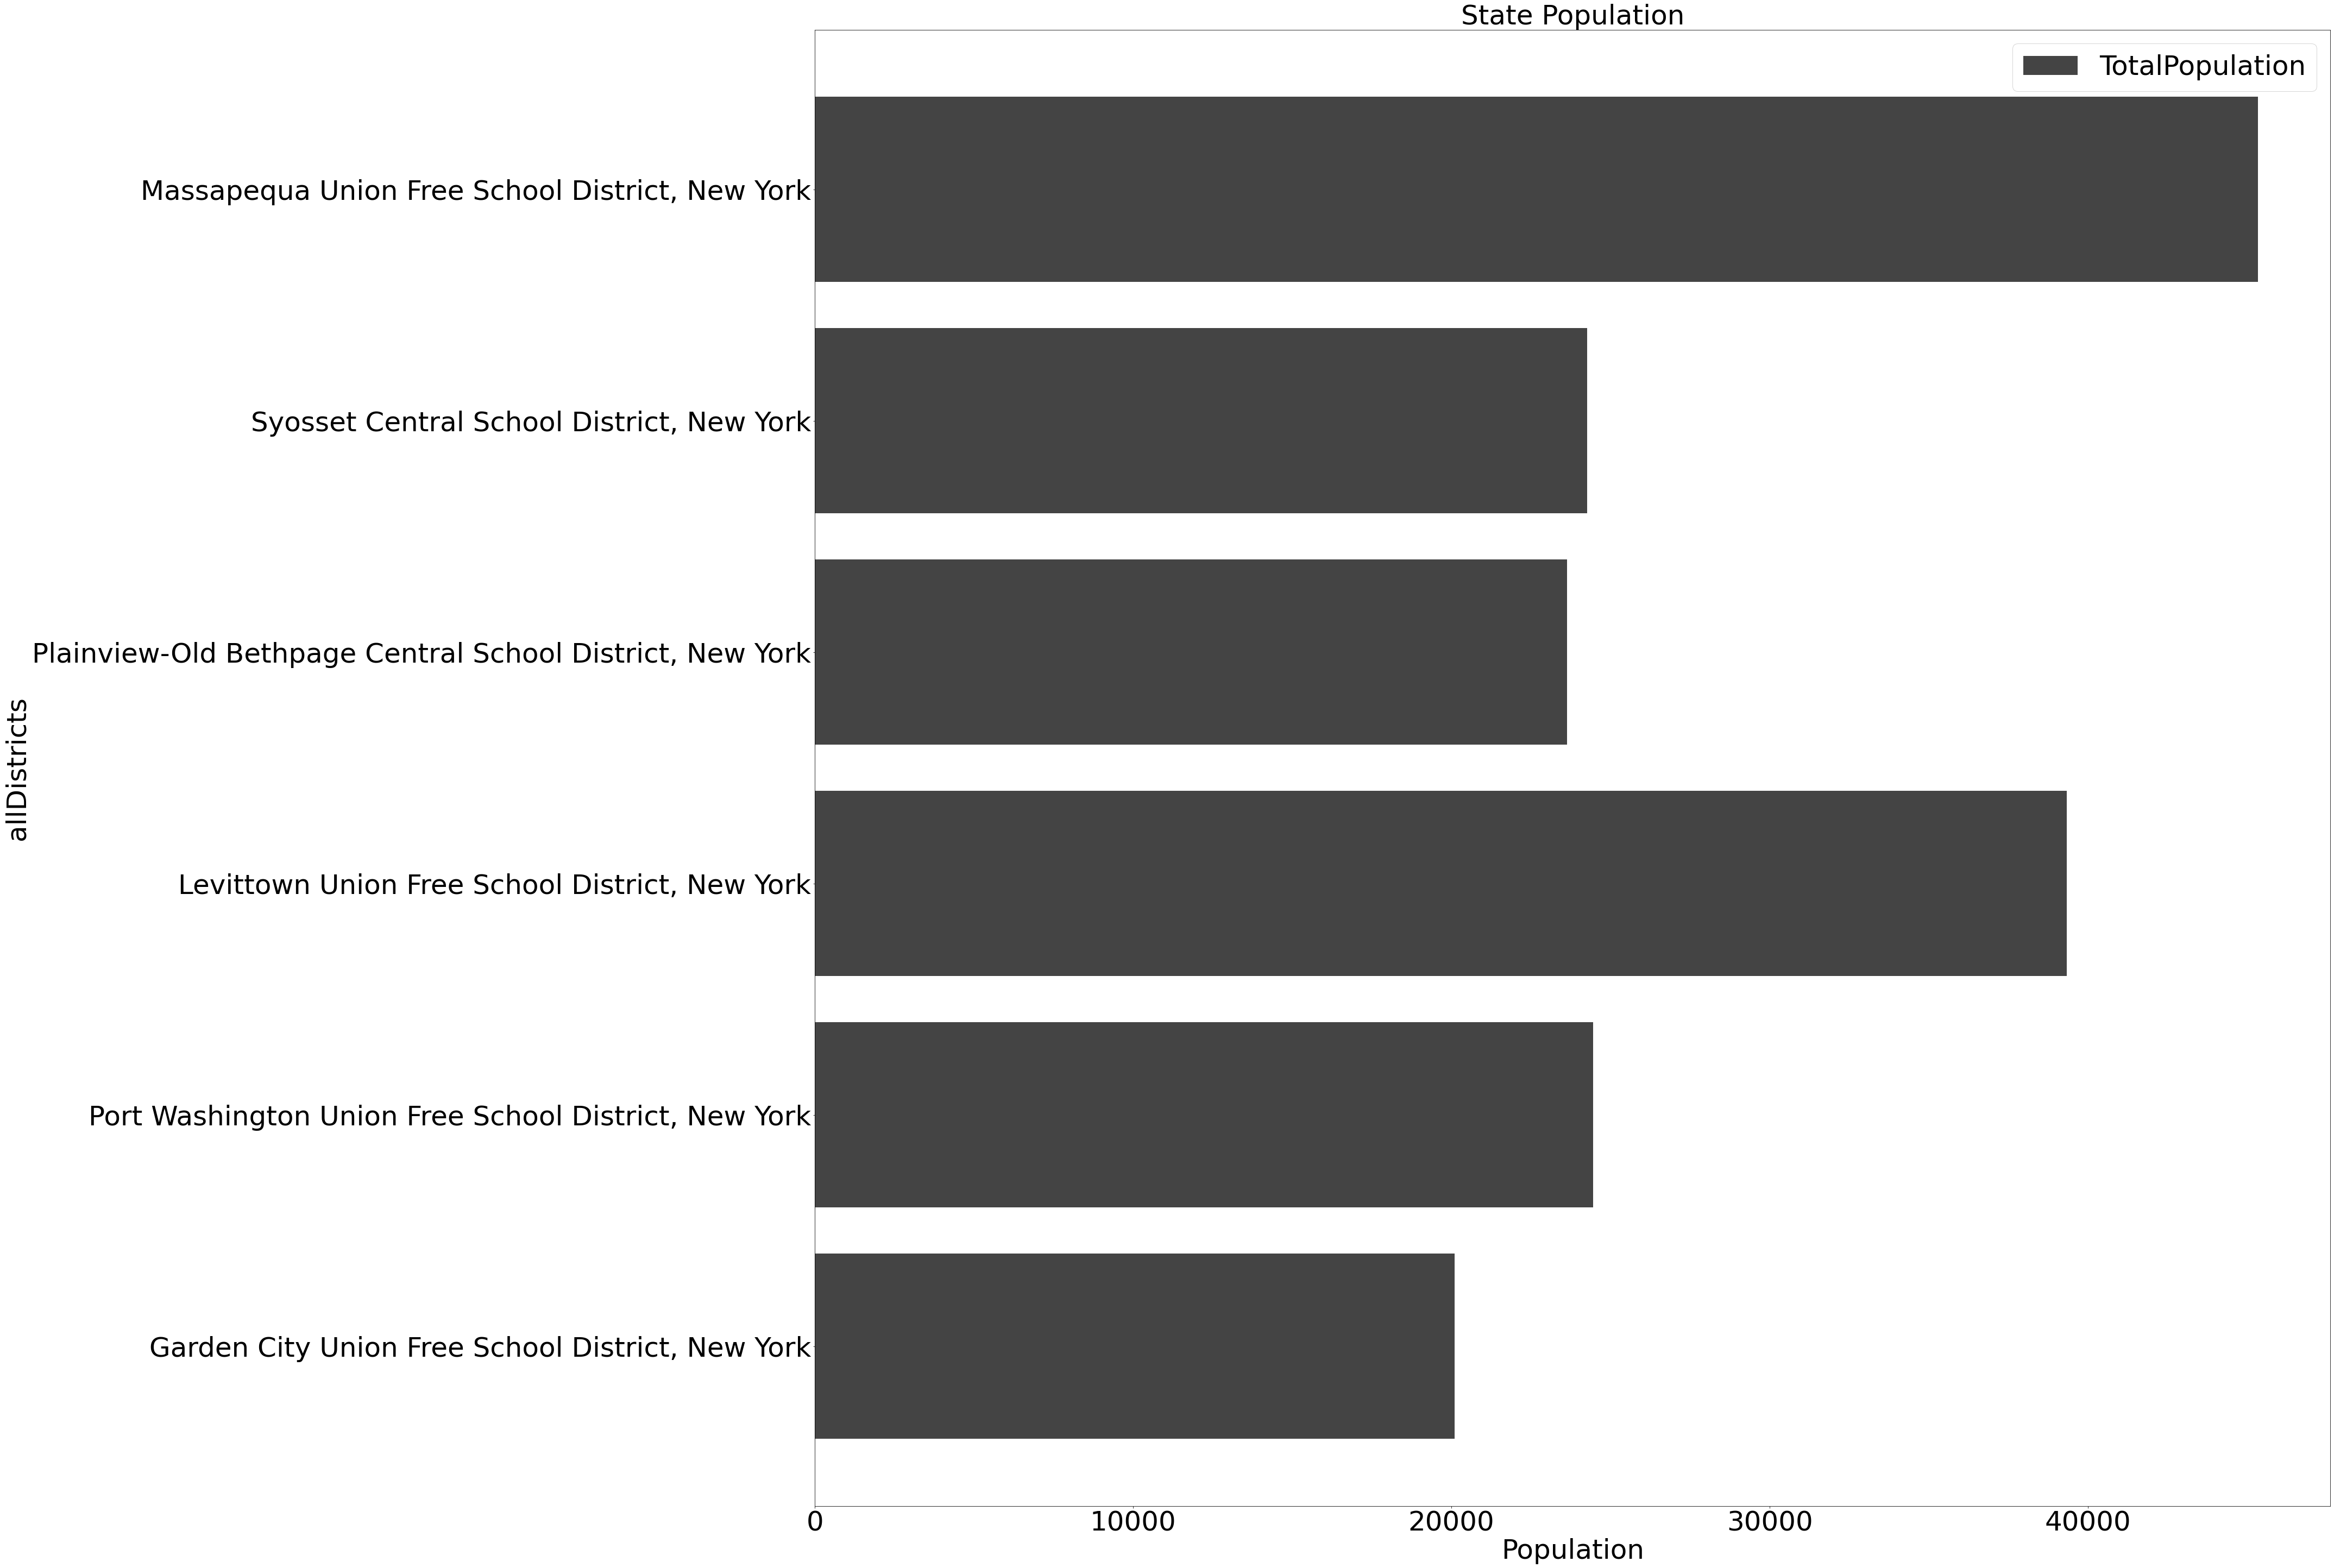

In [33]:
fig = plt.figure(figsize=(50,50))

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)


plt.title('State Population',fontsize=50)
plt.ylabel('allDistricts',fontsize=50)
plt.xlabel('Population',fontsize=50)

plt.barh(allDistricts, totalPop, 0.8, color = "#444444",label="TotalPopulation")
#plt.xticks([0,10])

plt.legend(fontsize=50)
plt.show()